In [1]:
# Importing the libraries
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/train.csv')

In [2]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

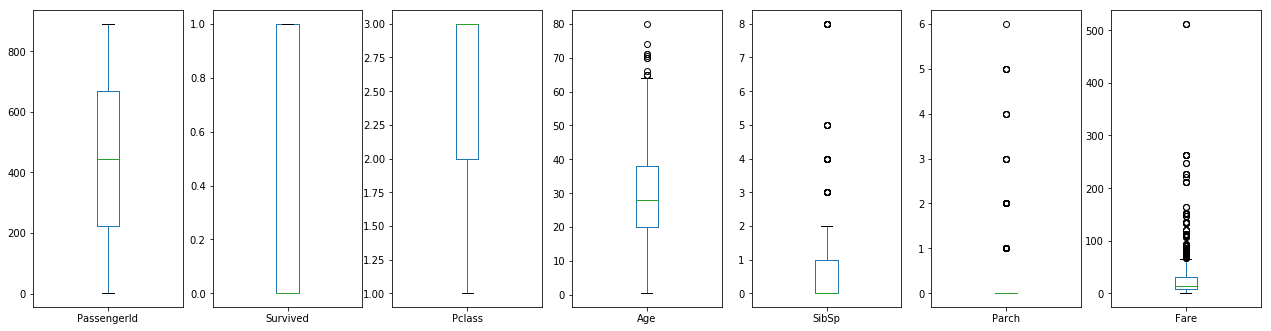

In [9]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=[22,12])

plt.show()

In [10]:
dataset.hist(figsize=[22,12])
plt.show()

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


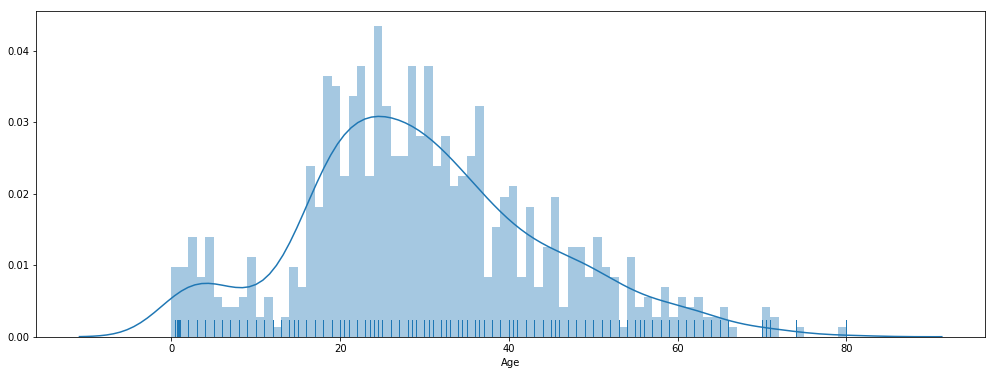

In [5]:
plt.figure(figsize = [17,6])
a = sns.distplot(dataset['Age'].dropna(),bins = range(0,81,1), rug = True)

In [6]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = dataset,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = dataset,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(dataset[dataset['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(dataset[dataset['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = dataset,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = dataset , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(dataset[dataset['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(dataset[dataset['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = dataset,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = dataset, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = dataset, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = dataset, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = dataset, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

In [ ]:
dataset1 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')

In [ ]:
#making traing nad test datset
X_train= dataset.iloc[:,[2,4,5,6,7,9]].values
y_train= dataset.iloc[:,1:2].values

X_test = dataset1.iloc[:,[1,3,4,5,6,8]].values
y_test = dataset2.iloc[:,1:2].values
# filling the NAN values withh mean 
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_train[:, 2:3])
X_train[:, 2:3] = imputer.transform(X_train[:,2:3])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(X_test[:, [2,5]])
X_test[:, [2,5]] = imputer.transform(X_test[:,[2,5]])

# making the dummy varaible of catagorical data


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:,1] = labelencoder_X.fit_transform(X_train[:, 1])
onehotencoder = OneHotEncoder(categorical_features=[0])
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train = X_train[:, 1:]

labelencoder_X1 = LabelEncoder()
X_test[:,1] = labelencoder_X1.fit_transform(X_test[:, 1])
onehotencoder1 = OneHotEncoder(categorical_features=[0])
X_test = onehotencoder1.fit_transform(X_test).toarray()
X_test = X_test[:, 1:]

# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# performng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
X_train.shape

In [ ]:
#importing model
from sklearn.linear_model import LinearRegression
#maiing object
regressor = LinearRegression()
#trainnig the model
regressor.fit(X_train, y_train)
#predicting the model on test data ste
y_pred = regressor.predict(X_test)

y_pred = y_pred > 0.5
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
l = dataset2.iloc[:,0].values

y_pred[1]

sub =[]
for i in range(len(y_pred)):
    if(y_pred[i]==False):
        sub.append(0)
    else:
        sub.append(1)
        
j = np.asarray(sub)
# accuracy of 97.84%


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

## Data Dictionary
#### VariableDefinitionKey: 
- survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
?str.replace()



In [ ]:
#what we need
dataset.columns

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X1 = dataset.iloc[:,0]
X2 = dataset.iloc[:, 2:]
X = pd.concat([X1,X2], axis=1)
X = X.replace(['female','male'],[0,1])#.values
#y = y.replace(['NaN',],[0,1])
X['Cabin'] = X['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X['Pclass'].mean(),  'SibSp' : X['SibSp'].mean(), 'Parch' : X['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X = X.fillna(value=values)
X = X.round(1)
X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']] = X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)
print ('The shape is',X.shape)
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']].values
y = dataset.iloc[:, 1].values

In [ ]:
# Class vs Survived
print(dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# sex vs Survived
print(dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# SibSp vs Survived
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print(dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# Parch vs Survived
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print(dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
X

In [ ]:
import statsmodels.formula.api as sm
X = np.append(np.ones((891,1)).astype(int),X,axis=1)
X

In [ ]:
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
X_test = X_test.replace(['female','male'],[0,1])
X_test['Cabin'] = X_test['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X_test['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X_test['Pclass'].mean(),  'SibSp' : X_test['SibSp'].mean(), 'Parch' : X_test['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X_test = X_test.fillna(value=values)
X_test = X_test.round(1)
X_test[['Sex','Age','Pclass','SibSp','Cabin']] = X_test[['Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)

In [ ]:
#['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']
X_train = X
y_train = y
X_test = X_test[['Pclass','Sex','Age','SibSp','Cabin']].values
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_test = y_test[:,1]

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred.min()
y_pred.max()

In [ ]:
#Normalized Data
normalized = np.array((y_pred-min(y_pred))/(max(y_pred)-min(y_pred)))

In [ ]:
normalized[normalized > 0.5] = 1
normalized[normalized <= 0.5] = 0

In [ ]:
normalized

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(normalized, y_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, normalized)
cm

### Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### SVM

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)